# Capstone Project - The battle of the neighbourhoods 

##### Table of contents:
1. Introduction
2. Data
3. Methodology
4. Results
5. Discussion
6. Conclusion
7. References

## Introduction
This assignment is targeted at stakeholders wanting to open a sit-down restaurant in a popular area.

London is one of the most popular cities in the world, it is home to 7.5 million of people and welcomes million of visitors each year [1]. The number of residents as well as tourists visiting London each year brings a boost to businesses and therefore London was chosen to analyze in the assignment.

London is made up of unique neighbourhoods, each with their own characteristics, however only the 10 best neighbourhoods to explore in London, according to source [2], were analyzed. This is because these 10 neighbourhoods are distinct and thus popular and have numerous people passing through each day making them an ideal area to open a restaurant. 

The distance of the restaurant to London central is investigated. The closer the restaurant is to London central results in more circulation of people in and out of the city center and thus a higher potential for customers. We will also look at what types of restaurants are common and popular in each neighbourhood helping us decide what type of restaurant to open.

Data analysis will be used on each of the neighbourhoods so that the best choice can be made by the stakeholders

## Data
The 10 London neighbourhoods that we are analyzing were obtained from source [2], which include:

•Mayfair
•Shoreditch
•Chelsea
•Greenwich
•Southwark
•Brixton
•Notting Hill
•Camden
•Soho
•Kensington

The coordinates of each of these neighbourhoods as well as London central was obtained through the geocoder module which converts an address into latitude and longitude coordinates.
Foursquare API was used to find data on the nearby venues within a radius of 500m from each neighbourhood. It was also used to find location data for a more specific type of restaurant nearby each neighbourhood, as well as to find reviews on specific restaurants.


In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

from math import radians, cos, sin, asin, sqrt

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    scipy-1.3.2                |   py36h921218d_0        18.0 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    nu

The coordinates of Central London as well as the coordinates of each of the 10 neighbourhoods we are comparing are found using the geocoder function. We need to define a user_agent to define an instance of the geocoder, and so we have named our agent london_agent.

In [3]:
#Finding Londons coordinates
address = 'London'

geolocator = Nominatim(user_agent="london_agent")
location = geolocator.geocode(address)
Londonlatitude = location.latitude
Londonlongitude = location.longitude
print(Londonlatitude, Londonlongitude)

51.5073219 -0.1276474


In [4]:
#Finding Mayfair coordinates
address = 'Mayfair'

geolocator = Nominatim(user_agent="london_agent")
location = geolocator.geocode(address)
Mayfairlatitude = location.latitude
Mayfairlongitude = location.longitude
print(Mayfairlatitude, Mayfairlongitude)

51.5110872 -0.147058


In [5]:
#Finding Shoreditch coordinates
address = 'Shoreditch'

geolocator = Nominatim(user_agent="london_agent")
location = geolocator.geocode(address)
Shoreditchlatitude = location.latitude
Shoreditchlongitude = location.longitude
print(Shoreditchlatitude, Shoreditchlongitude)

51.5266694 -0.0798926


In [6]:
#Finding Chelsea coordinates
address = 'Chelsea'

geolocator = Nominatim(user_agent="london_agent")
location = geolocator.geocode(address)
Chelsealatitude = location.latitude
Chelsealongitude = location.longitude
print(Chelsealatitude, Chelsealongitude)

51.4875417 -0.1682205


In [7]:
#Finding Greenwich coordinates
address = 'Greenwich, London'

geolocator = Nominatim(user_agent="london_agent")
location = geolocator.geocode(address)
Greenwichlatitude = location.latitude
Greenwichlongitude = location.longitude
print(Greenwichlatitude, Greenwichlongitude)

51.4820845 -0.0045417


In [8]:
#Finding Southwark coordinates
address = 'Southwark'

geolocator = Nominatim(user_agent="london_agent")
location = geolocator.geocode(address)
Southwarklatitude = location.latitude
Southwarklongitude = location.longitude
print(Southwarklatitude, Southwarklongitude)

51.5029222 -0.103458


In [9]:
#Finding Brixton coordinates
address = 'Brixton'

geolocator = Nominatim(user_agent="london_agent")
location = geolocator.geocode(address)
Brixtonlatitude = location.latitude
Brixtonlongitude = location.longitude
print(Brixtonlatitude, Brixtonlongitude)

51.4568044 -0.1167959


In [10]:
#Finding Notting Hill coordinates
address = 'Notting Hill'

geolocator = Nominatim(user_agent="london_agent")
location = geolocator.geocode(address)
NottingHilllatitude = location.latitude
NottingHilllongitude = location.longitude
print(NottingHilllatitude, NottingHilllongitude)

51.5109995 -0.2055267


In [11]:
#Finding Camden coordinates
address = 'Camden, London'

geolocator = Nominatim(user_agent="london_agent")
location = geolocator.geocode(address)
Camdenlatitude = location.latitude
Camdenlongitude = location.longitude
print(Camdenlatitude, Camdenlongitude)

51.5423045 -0.1395604


In [12]:
#Finding Soho coordinates
address = 'Soho'

geolocator = Nominatim(user_agent="london_agent")
location = geolocator.geocode(address)
Soholatitude = location.latitude
Soholongitude = location.longitude
print(Soholatitude, Soholongitude)

51.5131628 -0.1311754


In [13]:
#Finding Kensington coordinates
address = 'Kensington'

geolocator = Nominatim(user_agent="london_agent")
location = geolocator.geocode(address)
Kensingtonlatitude = location.latitude
Kensingtonlongitude = location.longitude
print(Kensingtonlatitude, Kensingtonlongitude)

51.4989948 -0.1991229


Now create a dataframe with the coordinates of these 10 neighbourhoods.

In [14]:
#create a dataframe with all the neighbourhoods and their coordinates
datacoordinates={'Neighbourhood':['Mayfair', 'Shoreditch', 'Chelsea', 'Greenwich', 'Southwark', 'Brixton', 'Notting Hill', 'Camden', 'Soho', 'Kensington'],
               'Latitude':[Mayfairlatitude, Shoreditchlatitude, Chelsealatitude, Greenwichlatitude, Southwarklatitude, Brixtonlatitude, NottingHilllatitude, Camdenlatitude, Soholatitude, Kensingtonlatitude],
               'Longitude':[Mayfairlongitude, Shoreditchlongitude, Chelsealongitude, Greenwichlongitude, Southwarklongitude, Brixtonlongitude, NottingHilllongitude, Camdenlongitude, Soholongitude, Kensingtonlongitude]}

In [15]:
dfcoordinates=pd.DataFrame(datacoordinates)
dfcoordinates

,Neighbourhood,Latitude,Longitude
0,Mayfair,51.511087,-0.147058
1,Shoreditch,51.526669,-0.079893
2,Chelsea,51.487542,-0.168220
3,Greenwich,51.482084,-0.004542
4,Southwark,51.502922,-0.103458
5,Brixton,51.456804,-0.116796
6,Notting Hill,51.510999,-0.205527
7,Camden,51.542305,-0.139560
8,Soho,51.513163,-0.131175
9,Kensington,51.498995,-0.199123


## Methodology and Analysis

The distance of each neighbourhood from London central is calculated below. This is calculated using the haversine formula which is a method of calculating the distance between two points on a spherical surface (i.e earth) using the latitude and longitude coordinates of the two points [3].

We will create a function called 'HaversineFormulaFunction' which calculates the distance between two point by using their coordinates as inputs. The function will be run to calculate the distance between each neighbourhood and London Central.

In [16]:
def HaversineFormulaFunction(Latitude1, Longitude1, Latitude2, Longitude2):
    Latitude1, Longitude1, Latitude2, Longitude2 = map(radians, [Latitude1, Longitude1, Latitude2, Longitude2]) # convert degrees to radians  
    a = sin((Latitude2 - Latitude1)/2)**2 + cos(Latitude1) * cos(Latitude2) * sin((Longitude2 - Longitude1)/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth (km)
    return c * r

In [17]:
#calculate distance between London and Mayfair
MayfairDist=HaversineFormulaFunction(Londonlatitude, Londonlongitude, Mayfairlatitude, Mayfairlongitude)
ShoreditchDist=HaversineFormulaFunction(Londonlatitude, Londonlongitude, Shoreditchlatitude, Shoreditchlongitude)
ChelseaDist=HaversineFormulaFunction(Londonlatitude, Londonlongitude, Chelsealatitude, Chelsealongitude)
GreenwichDist=HaversineFormulaFunction(Londonlatitude, Londonlongitude, Greenwichlatitude, Greenwichlongitude)
SouthwarkDist=HaversineFormulaFunction(Londonlatitude, Londonlongitude, Southwarklatitude, Southwarklongitude)
BrixtonDist=HaversineFormulaFunction(Londonlatitude, Londonlongitude, Brixtonlatitude, Brixtonlongitude)
NottingHillDist=HaversineFormulaFunction(Londonlatitude, Londonlongitude, NottingHilllatitude, NottingHilllongitude)
CamdenDist=HaversineFormulaFunction(Londonlatitude, Londonlongitude, Camdenlatitude, Camdenlongitude)
SohoDist=HaversineFormulaFunction(Londonlatitude, Londonlongitude, Soholatitude, Soholongitude)
KensingtonDist=HaversineFormulaFunction(Londonlatitude, Londonlongitude, Kensingtonlatitude, Kensingtonlongitude)

A new dataframe called Distancedf now needs to be created, containing each neighbourhood and its distance in km from London center.

In [18]:
#create a new df with distances
Distancedf=pd.DataFrame(dfcoordinates)
Distancedf.insert(3,"Distance from London Central (km)",[MayfairDist,ShoreditchDist,ChelseaDist,GreenwichDist,SouthwarkDist,
                                                                   BrixtonDist,NottingHillDist,CamdenDist,SohoDist,KensingtonDist],True)
Distancedf

,Neighbourhood,Latitude,Longitude,Distance from London Central (km)
0,Mayfair,51.511087,-0.147058,1.407073
1,Shoreditch,51.526669,-0.079893,3.942992
2,Chelsea,51.487542,-0.168220,3.567368
3,Greenwich,51.482084,-0.004542,8.972561
4,Southwark,51.502922,-0.103458,1.744228
5,Brixton,51.456804,-0.116796,5.667328
6,Notting Hill,51.510999,-0.205527,5.405249
7,Camden,51.542305,-0.139560,3.976241
8,Soho,51.513163,-0.131175,0.693854
9,Kensington,51.498995,-0.199123,5.033128


Create a bar chart representing the data from the Distancedf dataframe

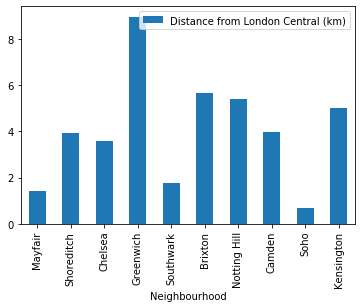

In [20]:
#create bar chart of distance of Neighbourhoods from London Central
Distancedf.plot.bar(x='Neighbourhood',y='Distance from London Central (km)')

Lets visualize the neighbourhoods on a map of London

In [21]:
# create map of London with the neighbourhoods we are investingating
map_london = folium.Map(location=[Londonlatitude, Londonlongitude], zoom_start=10)

# add markers to map
for lat, lng, Neighbourhood in zip(dfcoordinates['Latitude'], dfcoordinates['Longitude'], dfcoordinates['Neighbourhood']):
    label = '{}'.format(Neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london

In [22]:
#Defining Foursquare credentials
CLIENT_ID = '0C4DJQEIFY21FWU3MME5PAD5ITOVOWJBASEL44WRC4XRS3W2' # your Foursquare ID
CLIENT_SECRET = 'TQ0ZIVSW3XMTPFAA5ZYB2GNMYYCUNLAY0B02BRXUYMWWILBY' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0C4DJQEIFY21FWU3MME5PAD5ITOVOWJBASEL44WRC4XRS3W2
CLIENT_SECRET:TQ0ZIVSW3XMTPFAA5ZYB2GNMYYCUNLAY0B02BRXUYMWWILBY


Now we need to create a function to get venue data from all the neighbourhoods we are investigating from Foursquare.

In [23]:
LIMIT = 100
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
            
        # make the request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [24]:
london_venues = getNearbyVenues(names=dfcoordinates['Neighbourhood'],latitudes=dfcoordinates['Latitude'],longitudes=dfcoordinates['Longitude'])

Mayfair
Shoreditch
Chelsea
Greenwich
Southwark
Brixton
Notting Hill
Camden
Soho
Kensington


In [25]:
print(london_venues.shape)
london_venues.head()

(721, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mayfair,51.511087,-0.147058,Phillips,51.510381,-0.147017,Art Gallery
1,Mayfair,51.511087,-0.147058,La Petite Maison,51.512600,-0.146113,French Restaurant
2,Mayfair,51.511087,-0.147058,The Connaught,51.510138,-0.149498,Hotel
3,Mayfair,51.511087,-0.147058,Hedonism Wines,51.510803,-0.147450,Wine Shop
4,Mayfair,51.511087,-0.147058,Claridge's,51.512656,-0.147813,Hotel


In [26]:
#now we want to filter for venue category's that are restaurants -not including just the word restaurant because thats not specific enough
london_restaurant_data = london_venues[london_venues['Venue Category'].str.contains(" Restaurant")].reset_index(drop=True)

In [27]:
print(london_restaurant_data.shape)
london_restaurant_data

(161, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mayfair,51.511087,-0.147058,La Petite Maison,51.512600,-0.146113,French Restaurant
1,Mayfair,51.511087,-0.147058,Hakkasan,51.510460,-0.144741,Cantonese Restaurant
2,Mayfair,51.511087,-0.147058,Jamavar,51.510263,-0.148273,Indian Restaurant
3,Mayfair,51.511087,-0.147058,Jean Georges,51.510147,-0.149423,French Restaurant
4,Mayfair,51.511087,-0.147058,Amazonico,51.509784,-0.145053,South American Restaurant
...,...,...,...,...,...,...,...
156,Kensington,51.498995,-0.199123,Kitchen W8,51.499078,-0.196882,Modern European Restaurant
157,Kensington,51.498995,-0.199123,Bill's Restaurant,51.500906,-0.192708,English Restaurant
158,Kensington,51.498995,-0.199123,La Piccola Dely,51.496744,-0.193208,Italian Restaurant
159,Kensington,51.498995,-0.199123,Hare & Tortoise,51.496670,-0.204970,Japanese Restaurant


In [28]:
#creating a map of london with all the resturaunts within a 500m radius of the neighbourhoods coordinates
map_london_restaurant = folium.Map(location=[Londonlatitude, Londonlongitude], zoom_start=10)

# add markers to map
for lat, lng, Category in zip(london_restaurant_data['Venue Latitude'], london_restaurant_data['Venue Longitude'], london_restaurant_data['Venue Category']):
    label = '{}'.format(Category)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london_restaurant)  
    
map_london_restaurant

In [29]:
#see what all the different restaurants there are 
london_restaurant_data['Venue Category'].unique()

array(['French Restaurant', 'Cantonese Restaurant', 'Indian Restaurant',
       'South American Restaurant', 'Italian Restaurant',
       'Seafood Restaurant', 'Japanese Restaurant',
       'Modern European Restaurant', 'Chinese Restaurant',
       'English Restaurant', 'Korean Restaurant', 'Vietnamese Restaurant',
       'Asian Restaurant', 'Peruvian Restaurant',
       'Vegetarian / Vegan Restaurant', 'Turkish Restaurant',
       'Thai Restaurant', 'American Restaurant',
       'Middle Eastern Restaurant', 'Sushi Restaurant',
       'Portuguese Restaurant', 'Argentinian Restaurant',
       'Eastern European Restaurant', 'Israeli Restaurant',
       'Ramen Restaurant', 'Tapas Restaurant', 'Mexican Restaurant',
       'Spanish Restaurant', 'Fast Food Restaurant',
       'Caribbean Restaurant', 'Australian Restaurant',
       'Latin American Restaurant', 'Kebab Restaurant',
       'Malay Restaurant', 'African Restaurant', 'Sri Lankan Restaurant',
       'Udon Restaurant', 'Japanese Curr

Now we want to analyze each neighbourhood and find the frequency of occurrence of each restaurant. Then we can narrow down our search by only looking at the top 10 most common venues for each neighbourhood.

In [30]:
#now analyze each neighbourhood
# one hot encoding
london_onehot = pd.get_dummies(london_restaurant_data[['Venue Category']], prefix="", prefix_sep="")

# add neighbourhood column back to dataframe
london_onehot['Neighbourhood'] = london_restaurant_data['Neighbourhood'] 

# move neighbourhood column to the first column
fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot = london_onehot[fixed_columns]
#Group rows by neighbourhood and find the average of the frequency of occurrence of each restauraunt
london_grouped = london_onehot.groupby('Neighbourhood').mean().reset_index()

In [31]:
#sort venues in descending order
num_top_venues=5
def return_most_common_restaurant(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [32]:
#put the top 10 restaurants of each neighbourhood in its own dataframe
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Restaurant'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Restaurant'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = london_grouped['Neighbourhood']

for ind in np.arange(london_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_restaurant(london_grouped.iloc[ind, :], num_top_venues)



## Results

In [33]:
neighbourhoods_venues_sorted

,Neighbourhood,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
0,Brixton,Tapas Restaurant,Indian Restaurant,Caribbean Restaurant,Modern European Restaurant,Vietnamese Restaurant,English Restaurant,Japanese Curry Restaurant,Italian Restaurant,Israeli Restaurant,French Restaurant
1,Camden,Italian Restaurant,Vegetarian / Vegan Restaurant,Caribbean Restaurant,Vietnamese Restaurant,Ramen Restaurant,American Restaurant,Asian Restaurant,French Restaurant,Kebab Restaurant,Malay Restaurant
2,Chelsea,English Restaurant,Japanese Restaurant,Italian Restaurant,French Restaurant,Sushi Restaurant,Middle Eastern Restaurant,Vietnamese Restaurant,American Restaurant,Cantonese Restaurant,Caribbean Restaurant
3,Greenwich,Italian Restaurant,Japanese Restaurant,Portuguese Restaurant,Argentinian Restaurant,Sushi Restaurant,French Restaurant,English Restaurant,Japanese Curry Restaurant,Israeli Restaurant,Indian Restaurant
4,Kensington,Italian Restaurant,Modern European Restaurant,Portuguese Restaurant,Filipino Restaurant,Mediterranean Restaurant,Fast Food Restaurant,Middle Eastern Restaurant,Persian Restaurant,English Restaurant,Japanese Restaurant
5,Mayfair,Indian Restaurant,French Restaurant,Japanese Restaurant,Italian Restaurant,Cantonese Restaurant,Seafood Restaurant,Modern European Restaurant,Chinese Restaurant,South American Restaurant,English Restaurant
6,Notting Hill,Italian Restaurant,Latin American Restaurant,Fast Food Restaurant,Japanese Restaurant,Australian Restaurant,Caribbean Restaurant,Indian Restaurant,Japanese Curry Restaurant,Israeli Restaurant,French Restaurant
7,Shoreditch,Italian Restaurant,Vietnamese Restaurant,Peruvian Restaurant,Japanese Restaurant,Asian Restaurant,English Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Modern European Restaurant,Korean Restaurant
8,Soho,Italian Restaurant,Seafood Restaurant,Japanese Restaurant,Sushi Restaurant,Vietnamese Restaurant,French Restaurant,Israeli Restaurant,Japanese Curry Restaurant,English Restaurant,Dim Sum Restaurant
9,Southwark,Italian Restaurant,Chinese Restaurant,Turkish Restaurant,English Restaurant,Ramen Restaurant,Vietnamese Restaurant,Modern European Restaurant,Argentinian Restaurant,Asian Restaurant,Eastern European Restaurant


Italian food the most common restaurant from the above dataframe and so we can assume it is the most popular type of restaurant.
So lets only have a look at the Italian restaurants in each neighbourhood.

In [34]:
london_italian_restaurant_data = london_restaurant_data[london_restaurant_data['Venue Category'].str.contains("Italian")].reset_index(drop=True)

In [35]:
london_italian_restaurant_data

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mayfair,51.511087,-0.147058,Delfino,51.510248,-0.148704,Italian Restaurant
1,Mayfair,51.511087,-0.147058,C London,51.511253,-0.147638,Italian Restaurant
2,Shoreditch,51.526669,-0.079893,Popolo,51.526104,-0.082098,Italian Restaurant
3,Shoreditch,51.526669,-0.079893,Via Emilia,51.527335,-0.080484,Italian Restaurant
4,Shoreditch,51.526669,-0.079893,Gloria by Big Mamma,51.524964,-0.081305,Italian Restaurant
5,Shoreditch,51.526669,-0.079893,Bottega Prelibato,51.526099,-0.081391,Italian Restaurant
6,Chelsea,51.487542,-0.168220,La Mia Mamma,51.486100,-0.172131,Italian Restaurant
7,Chelsea,51.487542,-0.168220,Made in Italy,51.486218,-0.171981,Italian Restaurant
8,Chelsea,51.487542,-0.168220,Buona Sera at the Jam,51.485402,-0.173892,Italian Restaurant
9,Greenwich,51.482084,-0.004542,Franco Manca,51.481200,-0.010054,Italian Restaurant


In [36]:
# create map of London showing the italian restauraunts in each neighbourhood
map_london_italianrestaurant = folium.Map(location=[Londonlatitude, Londonlongitude], zoom_start=10)

# add markers to map
for lat, lng, Category in zip(london_italian_restaurant_data['Venue Latitude'], london_italian_restaurant_data['Venue Longitude'], london_italian_restaurant_data['Venue Category']):
    label = '{}'.format(Category)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london_italianrestaurant)  
    
map_london_italianrestaurant

In [37]:
italian_data=london_italian_restaurant_data['Neighbourhood'].value_counts()
italian_data

Soho            4
Southwark       4
Shoreditch      4
Notting Hill    3
Kensington      3
Chelsea         3
Camden          3
Mayfair         2
Greenwich       2
Name: Neighbourhood, dtype: int64

In [38]:
dfitalian=london_italian_restaurant_data.groupby(['Neighbourhood'])['Venue'].agg(', '.join)

In [39]:
dfitalian=dfitalian.sample(frac=1).reset_index()

In [40]:
dfitalian

,Neighbourhood,Venue
0,Mayfair,"Delfino, C London"
1,Southwark,"Macellaio RC, Capricci, Marco's New York Itali..."
2,Soho,"Vapiano, Lina Stores, Bocca Di Lupo, Sartori"
3,Chelsea,"La Mia Mamma, Made in Italy, Buona Sera at the..."
4,Shoreditch,"Popolo, Via Emilia, Gloria by Big Mamma, Botte..."
5,Greenwich,"Franco Manca, Zizzi"
6,Notting Hill,"Osteria Basilico, NEGOZIO CLASSICA, Chucs Rest..."
7,Camden,"Casa Tua, Domo94 Italian Restaurant, Anima e C..."
8,Kensington,"Pizzicotto, Il Portico, La Piccola Dely"


A new dataframe shown below represents the number and names of the Italian restaurants surrounding each neighbourhood.

In [41]:
dfitalian.insert(1,"No. Italian Restauraunts",['2','4','4','3','4','2','3','3','3'],True)
dfitalian

,Neighbourhood,No. Italian Restauraunts,Venue
0,Mayfair,2,"Delfino, C London"
1,Southwark,4,"Macellaio RC, Capricci, Marco's New York Itali..."
2,Soho,4,"Vapiano, Lina Stores, Bocca Di Lupo, Sartori"
3,Chelsea,3,"La Mia Mamma, Made in Italy, Buona Sera at the..."
4,Shoreditch,4,"Popolo, Via Emilia, Gloria by Big Mamma, Botte..."
5,Greenwich,2,"Franco Manca, Zizzi"
6,Notting Hill,3,"Osteria Basilico, NEGOZIO CLASSICA, Chucs Rest..."
7,Camden,3,"Casa Tua, Domo94 Italian Restaurant, Anima e C..."
8,Kensington,3,"Pizzicotto, Il Portico, La Piccola Dely"


We are interested in opening an Italian restaurant in either Mayfair or Greenwich as they have the least number of Italian restaurants within a 500m radius. Knowing the ratings on these restaurants will also influence our decision on which neighbourhood to open up another Italian restaurant and therefore we need to obtain the venue id of these restaurants.

In [42]:
radius2 = 5
urlDelfino='https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, 51.510248, -0.148704, VERSION, radius2, LIMIT)
urlCLondon='https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, 51.511253,-0.147638, VERSION, radius2, LIMIT)
urlFrancoManca='https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, 51.481200,-0.010054, VERSION, radius2, LIMIT)
urlZizzi='https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, 51.483521,-0.009759, VERSION, radius2, LIMIT)

In [43]:
resultsDelfino = requests.get(urlDelfino).json()
venuesDelfino = resultsDelfino['response']['venues']
dataframeDelfino = json_normalize(venuesDelfino)

resultsCLondon = requests.get(urlCLondon).json()
venuesCLondon = resultsCLondon['response']['venues']
dataframeCLondon = json_normalize(venuesCLondon)

resultsFrancoManca = requests.get(urlFrancoManca).json()
venuesFrancoManca = resultsFrancoManca['response']['venues']
dataframeFrancoManca = json_normalize(venuesFrancoManca)

resultsZizzi = requests.get(urlZizzi).json()
venuesZizzi = resultsZizzi['response']['venues']
dataframeZizzi = json_normalize(venuesZizzi)

In [44]:
dataframeDelfino.loc[dataframeDelfino['name'] == 'Delfino']

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,venuePage.id,location.neighborhood,location.crossStreet
0,4ac518e1f964a52073aa20e3,Delfino,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",v-1575790254,False,121a Mount St,51.510248,-0.148704,"[{'label': 'display', 'lat': 51.510248, 'lng':...",0,W1K 3NW,GB,London,Greater London,United Kingdom,"[121a Mount St, London, Greater London, W1K 3N...",NaN,NaN,NaN


In [45]:
dataframeCLondon.loc[dataframeCLondon['name'] == 'C London']
dataframeCLondon.head(1)

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,location.neighborhood,venuePage.id
0,4ac518e4f964a520d0aa20e3,C London,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",v-1575790254,False,25 Davies St,51.511253,-0.147638,"[{'label': 'display', 'lat': 51.51125343821309...",0,W1K 3DE,GB,London,Greater London,United Kingdom,"[25 Davies St, London, Greater London, W1K 3DE...",NaN,NaN,NaN


In [46]:
dataframeFrancoManca.loc[dataframeFrancoManca['name'] == 'Franco Manca']

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,venuePage.id,location.neighborhood
0,5cbc747db6b04b002cefc690,Franco Manca,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",v-1575790255,False,29-31 Church St,51.4812,-0.010054,"[{'label': 'display', 'lat': 51.4812, 'lng': -...",0,SE10 9BJ,GB,London,Greater London,United Kingdom,"[29-31 Church St, Greenwich, Greater London, S...",NaN,NaN,NaN


In [47]:
dataframeZizzi.loc[dataframeZizzi['name'] == 'Zizzi']

,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.neighborhood,venuePage.id
8,5158422ce4b04ba489eb8039,Zizzi,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",v-1575790255,False,"Unit W2, Greenwich Promenade (Pier) Cutty Sark...",Cutty Sark Gardens,51.483521,-0.009759,"[{'label': 'display', 'lat': 51.48352080010128...",0,SE10 9HT,GB,Greenwich West,Greater London,United Kingdom,"[Unit W2, Greenwich Promenade (Pier) Cutty Sar...",NaN,NaN


In [48]:
#find the ratings of these restauraunts

venue_idDelfino = '4ac518e1f964a52073aa20e3' # ID of Delfino in Mayfair
urlDelfino = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_idDelfino, CLIENT_ID, CLIENT_SECRET, VERSION)
venue_idCLondon = '4ac518e4f964a520d0aa20e3' # ID of C London in Mayfair
urlCLondon = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_idCLondon, CLIENT_ID, CLIENT_SECRET, VERSION)
venue_idFrancoManca = '5cbc747db6b04b002cefc690' # ID of Franco Manca in Greenwich
urlFrancoManca = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_idFrancoManca, CLIENT_ID, CLIENT_SECRET, VERSION)
venue_idZizzi = '5158422ce4b04ba489eb8039' # ID of Zizzi in Greenwich
urlZizzi = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_idZizzi, CLIENT_ID, CLIENT_SECRET, VERSION)

resultDelfino = requests.get(urlDelfino).json()
resultCLondon = requests.get(urlCLondon).json()
resultFrancoManca = requests.get(urlFrancoManca).json()
resultZizzi = requests.get(urlZizzi).json()

print(" Delfino rating: ", resultDelfino['response']['venue']['rating'],'\n', "C London rating: ", resultCLondon['response']['venue']['rating'],'\n',
      "Franco Manca rating: ", resultFrancoManca['response']['venue']['rating'],'\n', "Zizzi rating: ", resultZizzi['response']['venue']['rating'])


 Delfino rating:  8.7 
 C London rating:  8.1 
 Franco Manca rating:  8.3 
 Zizzi rating:  6.5


In [49]:
#find the comments on the restaurants
limit = 15
urlDelfino = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(venue_idDelfino, CLIENT_ID, CLIENT_SECRET, VERSION, limit)
urlCLondon = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(venue_idCLondon, CLIENT_ID, CLIENT_SECRET, VERSION, limit)
urlFranco = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(venue_idFrancoManca, CLIENT_ID, CLIENT_SECRET, VERSION, limit)
urlZizzi = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(venue_idZizzi, CLIENT_ID, CLIENT_SECRET, VERSION, limit)

resultsDelfino = requests.get(urlDelfino).json()
resultsCLondon = requests.get(urlCLondon).json()
resultsFranco = requests.get(urlFranco).json()
resultsZizzi = requests.get(urlZizzi).json()

In [50]:
resultsDelfino

{'meta': {'code': 200, 'requestId': '5deca68f9239354a4c186bf8'},
 'response': {'tips': {'count': 93,
   'items': [{'id': '539f0ea1498e17d99aa91a3f',
     'createdAt': 1402932897,
     'text': 'Upstairs, delfino do the best pizzas around. Pure and simple. Or you can have traditional Italian. But why would you? The staff are brilliant, just the right amount of upbeat buzz.',
     'type': 'user',
     'canonicalUrl': 'https://foursquare.com/item/539f0ea1498e17d99aa91a3f',
     'lang': 'en',
     'likes': {'count': 0, 'groups': []},
     'logView': True,
     'agreeCount': 18,
     'disagreeCount': 0,
     'lastVoteText': 'Upvoted 2 weeks ago',
     'lastUpvoteTimestamp': 1574281143,
     'todo': {'count': 0},
     'user': {'id': '1664755',
      'firstName': 'Myka',
      'lastName': 'England',
      'gender': 'female',
      'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
       'suffix': '/1664755_hIQ-U4Pp_DQtRo3sCpj2Fat71Vi1kR1ft8aljsYpfg9FXKhXdXQ5Arkh_77iRQLQLQ9yiA-Gi.jpg'}},

In [51]:
resultsCLondon

{'meta': {'code': 200, 'requestId': '5deca6bcc8cff245ee1c7f1a'},
 'response': {'tips': {'count': 104,
   'items': [{'id': '582dd36ccb369f3f40a5bc7f',
     'createdAt': 1479398252,
     'text': "All the dishes we've tried were soooo good and the portions are more than enough👌🏻I recommend the gnocchi as a main dish and the parmigiana as an appetizer",
     'type': 'user',
     'canonicalUrl': 'https://foursquare.com/item/582dd36ccb369f3f40a5bc7f',
     'lang': 'en',
     'likes': {'count': 0, 'groups': []},
     'logView': True,
     'agreeCount': 13,
     'disagreeCount': 0,
     'lastVoteText': 'Upvoted Sep 9',
     'lastUpvoteTimestamp': 1568064259,
     'todo': {'count': 0},
     'user': {'id': '88580507',
      'firstName': 'Sarah',
      'lastName': 'K',
      'gender': 'female',
      'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
       'suffix': '/blank_girl.png',
       'default': True}}}]}}}

In [52]:
resultsFranco 

{'meta': {'code': 200, 'requestId': '5deca681963d29001ba7321d'},
 'response': {'tips': {'count': 0, 'items': []}}}

In [53]:
resultsZizzi 

{'meta': {'code': 200, 'requestId': '5deca698a2e538001b3c01fa'},
 'response': {'tips': {'count': 11,
   'items': [{'id': '51fd8a5e498e32e3a1f14155',
     'createdAt': 1375570526,
     'text': 'The table by the river is best. Suggest Calzone di pollo and tiramisu! Nice place and good food for the price',
     'type': 'user',
     'canonicalUrl': 'https://foursquare.com/item/51fd8a5e498e32e3a1f14155',
     'lang': 'en',
     'likes': {'count': 1,
      'groups': [{'type': 'others',
        'count': 1,
        'items': [{'id': '35312152',
          'firstName': 'Liam',
          'gender': 'male',
          'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
           'suffix': '/JBB14NIDMX41NS42.jpg'}}]}],
      'summary': '1 like'},
     'logView': True,
     'agreeCount': 2,
     'disagreeCount': 0,
     'todo': {'count': 0},
     'user': {'id': '9005582',
      'firstName': 'Jaime',
      'lastName': 'C.',
      'gender': 'male',
      'photo': {'prefix': 'https://fastly.4sqi.net

## Discussion
The aim of the project was to aid stakeholder’s decision in opening a restaurant though a comparison of 10 London neighbourhoods.  It was clear from figure 7 that the most common type of restaurant in 7 out of the 10 neighbourhoods was an Italian restaurant. It was deduced that Italian restaurants are a popular type of restaurant and so it was decided that the type of restaurant that would be most profitable would be an Italian restaurant. As a result, further filtering was completed to determine the number of Italian restaurants within a 500m radius of each neighbourhood. Figure 9 displaces a folium map of all the Italian restaurants surrounding each neighbourhood, providing an effective means of passing information to the stakeholders. Figure 10 clearly shows that Shoreditch, Southwark and Soho each have 4 Italian restaurants within 500m and so these three neighbourhoods are not a good option for opening an Italian restaurant. On the other hand, Mayfair and Greenwich only have 2 Italian restaurants surrounding their neighbourhood. Thus, further analysis was performed on Mayfair and Greenwich to decide which of the two would be a better option to open up a restaurant in.

Foursquare API was used to find the ratings of each of the two restaurants in Mayfair and Greenwich. This is because the lower the ratings of the restaurants results in a better prospect of opening a successful restaurant there. Table 1 shows the results obtained from Foursquare API where Mayfair’s two restaurants have high ratings and one of Greenwich’s restaurants have a low rating. I was then decided to look at the reviews on the restaurants to see if that could give us a better idea of the quality of the restaurants. Three of the restaurants that had tips were complementary. Despite the fact that one of Greenwich’s restaurants had a low rating, it had a positive review and so the deciding factor between these two neighbourhood’s will be the distance from city central. Greenwich is the furthest neighbourhood from London center with a distance of 8.9km whereas Mayfair is 1.4km. It is therefore determined that Mayfair is the most ideal London neighbourhood to open an Italian restaurant out of the 10 neighbourhood’s that were compared.

In order to improve this analysis, a radius of more than 500m could have been used when obtaining venue data from Foursquare. I wouldn’t recommend using a radius of longer than 1km as we don’t want to encroach on another nearby neighbourhood and skew the results. In addition, more than 10 neighbourhoods could have been analyzed in order to get a broader sample of data and thus able to make a more informed decision.


## Conclusion
The goal of this assignment was to analyze different neighbourhood’s in London in order to aid stakeholder’s search for an optimum area to open a restaurant as well as the type of restaurant that would be most lucrative.

Foursquare API data was used to find restaurant venue information surrounding each of the 10 neighbourhoods within a specified radius. After which it was determined that an Italian restaurant was the most common amongst the neighbourhoods and thus an ideal restaurant type to open due to its popularity. Once the search was narrowed down to 2 neighbourhoods, further analysis, using Foursquare API, was completed to obtain data on the ratings and tips of these neighbourhood’s. Finally, it was determined that Mayfair was the best option to open an Italian restaurant due to its proximity to London center as well as the minimum number of Italian restaurants within 500m of its coordinates.

This study could be improved by expanding the number of neighbourhoods compared as well as by increasing the radius of the venues surrounding each neighbourhood. Multiple additional factors including noise levels, crime rate and vicinity to public transportation could be used in future analysis to help the stakeholders make their final decision.

## References
[1]	Ferne Arfin. 2019. Top 20 Most Popular UK Cities for International Visitors. 06 December 2019. <https://www.tripsavvy.com/popular-uk-cities-for-international-visitors-1661845>

[2]	Rachel Erdos. 2019. The 10 Best Neighbourhoods to Explore in London. 06 December 2019. <https://www.tripsavvy.com/best-neighbourhoods-to-explore-in-london-4129386>

[3]	Spk578. 2017. Distance on a sphere: The Haversine Formula. 06 December 2019. <https://community.esri.com/groups/coordinate-reference-systems/blog/2017/10/05/haversine-formula>
